# News Recommendation System


## Introduction
In today's digital age, finding news articles that capture users' interests has become increasingly challenging. This project aims to develop a news recommendation system that suggests articles based on users' preferences. The recommendation system operates by analyzing the similarities between news headlines using TF-IDF (Term Frequency-Inverse Document Frequency) and Cosine Similarity methods. When a user inputs a specific news title, the system recommends the top 10 articles with similar content. This approach personalizes the news experience for users, facilitating a more effective information flow.

You can access the dataset from the following link: [News Recommendation Dataset](https://statso.io/news-recommendation-case-study/)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
df= pd.read_csv("News.csv")

In [6]:
df.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


C:\Users\zeyil\AppData\Local\Temp\ipykernel_28780\840858742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=news_cat.index,y= news_cat.values, palette= "bright")


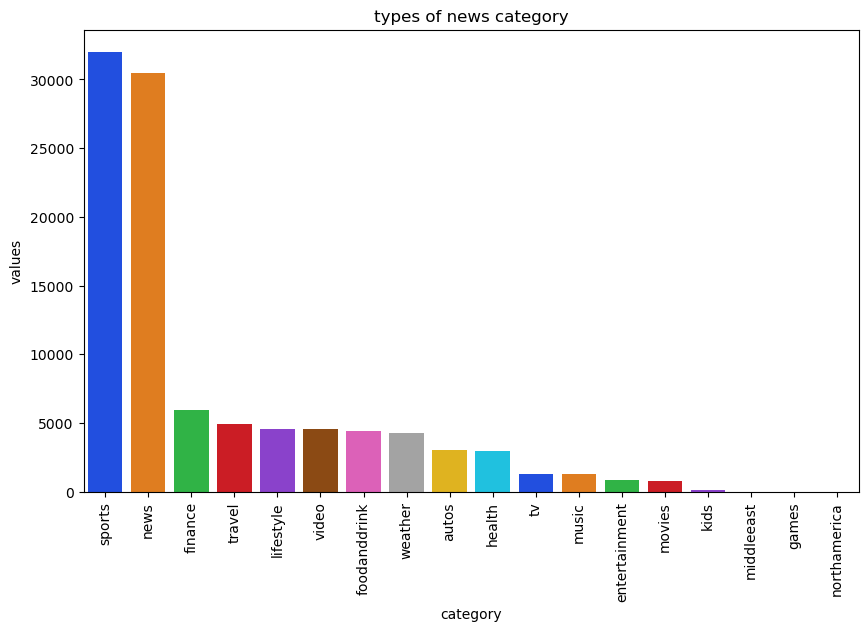

In [7]:
news_cat= df["News Category"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=news_cat.index,y= news_cat.values, palette= "bright")
plt.title("types of news category")
plt.xlabel("category")
plt.xticks(rotation= 90)
plt.ylabel("values")
plt.show()

+ Recommendations based on the News Category alone may remain too superficial. Therefore, the system will be built using the "summary" and "title" column in the dataset for more relevant recommendations.


In [9]:
indices = pd.Series(df.index, index=df['Title']).to_dict()

In [10]:
feature = df["Title"].tolist()
tfidf= text.TfidfVectorizer(stop_words= "english")  
tfidf_matrix= tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

+ we utilize TF-IDF (Term Frequency-Inverse Document Frequency) to convert news titles into vectors. This allows us to quantify word importance in relation to the entire dataset. 

+ We then create a cosine similarity matrix from these vectors to measure how similar the news articles are based on their titles. This process enables us to recommend articles that are relevant to a user's input.

In [39]:
def news_recommendation(Title, similarity= similarity):
    index= indices[Title]  # Returns the position in the title creates a dictionary
    similarity_scores= list(enumerate(similarity[index]))   # enumerate : It adds a number to each element, linking each similarity score to its news index.
    similarity_scores = sorted(similarity_scores, # her bir tuple ın bir haber makalesinin indeksini ve ona karşılık gelen beznerlik puanı içerdiği bir liste 
    key= lambda x:x[1], reverse= True)   # x[0] index x[1] similarity score ,  #beznerlik sıralaması artandan azalana
    similarity_scores = similarity_scores[0:10]   # ilk 10
    newindices = [i[0] for i in similarity_scores]
    return df["Title"].iloc[newindices]    

In [41]:
print(news_recommendation("Walmart Slashes Prices on Last-Generation iPads"))

1           Walmart Slashes Prices on Last-Generation iPads
83827     Walmart's Black Friday 2019 ad: the best deals...
76024     Walmart Black Friday 2019 deals unveiled: Huge...
90316     US consumer prices up 0.4% in October; gasolin...
89588     Consumer prices rise most in 7 months on highe...
32839                   Inside the next generation of irons
37970     Walmart and Kroger Undercut Drugstore Chains' ...
100684    Nissan slashes full-year forecast as first-hal...
74916                    The Top Deals at Walmart Right Now
39634     Federal Reserve slashes interest rates for thi...
Name: Title, dtype: object


In [43]:
print(news_recommendation("50 Worst Habits For Belly Fat"))	

2                            50 Worst Habits For Belly Fat
74965    If You Want to Lose Belly Fat in 2 Months, You...
14161              10 Ways to Burn Belly Fat in 10 Minutes
304      Those Grueling Workouts May Not Help You Lose ...
9463     If You Can't Seem to Lose Belly Fat, Experts A...
73598    Healthy Men: Men and belly fat: A bad combination
14619    I Used to Obsess About My Belly Fat, Until I S...
32225    3 Foods You Should Eat at Breakfast If You Wan...
597      If You Have a Slow Metabolism, Here Are 5 Doct...
72538    Reduce Stomach Bloating: 9 Daily Habits That F...
Name: Title, dtype: object


## Conclusion
This project demonstrates how recommendation systems can be effectively applied in the news domain. The developed model ranks news articles based on user preferences, providing quick access to engaging content. Future work will focus on enhancing the recommendation system's accuracy through larger datasets and alternative algorithms. This will further improve user experience and facilitate effective information dissemination in the journalism field.